show frequencies yes
on consiedere les mots vides?yes/no no
887 lenght of corpus
347  stop words
540  -without stop words
show wordcloud? yes


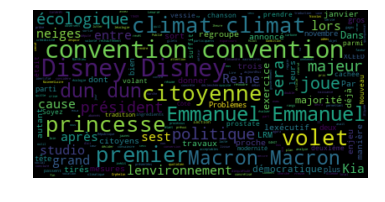

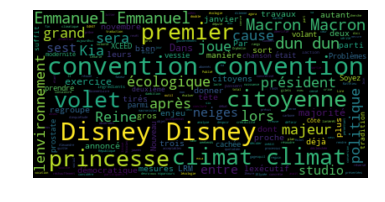

show graph? yes
How many top words do you wish to print?10


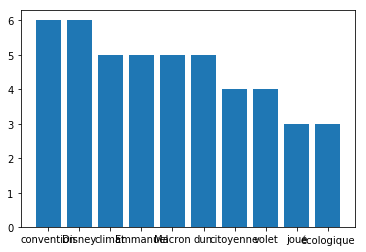

par ordre croissant?yes/no no
convention 6
Disney 6
climat 5
Emmanuel 5
Macron 5
dun 5
citoyenne 4
volet 4
joue 3
écologique 3
sera 3
politique 3
majeur 3
président 3
lenvironnement 3
cause 3
lors 3
Reine 3
neiges 3
entre 3
studio 3
sest 3
Dans 2
majorité 2
on 2
exercice 2
démocratique 2
regroupe 2
150 2
citoyens 2
tirés 2
sort 2
enjeu 2
mesures 2
après 2
grand 2
annoncé 2
janvier 2
lexécutif 2
déjà 2
trois 2
travaux 2
autant 2
leurs 2
manière 2
dont 2
donner 2
LRM 2
novembre 2
gros 2
bien 2
parti 2
deux 2
plus 2
tête 2
Problèmes 2
prostate 2
était 2
cachée 2
vessie 2
Soyez 2
parmi 2
premiers 2
prendre 2
volant 2
Nouveau 2
Kia 2
deuxième 2
suffit 2
premier 2
tradition 2
modernité 2
Côté 2
princesse 2
ingrédients 2
princesses 2
passent 2
laction 2
Avec 1
crédibilité 1
considère 1
Par 1
Alexandre 1
Lemarié 1
Publié 1
aujourdhui 1
04h07 1
mis 1
jour 1
11h09 1
Comment 1
rendre 1
acceptables 1
plan 1
social 1
faveur 1
crise 1
gilets 1
jaunes 1
déclenchée 1
taxe 1
carbone 1
lissue 1
débat 1


In [6]:
import spacy
import instruments
import re
import plotly.graph_objects as go
nlp = spacy.load('fr_core_news_sm')
##generelise here
with open('test.txt','r',encoding='utf-8') as corpus:
    co=corpus.readlines()
    dic=[]
    for e in co:
        e.split('\n')
        dic.append(e)
dic2=[]
for e in co:
    for i in e.replace('\n','').replace('?','').replace('!','').replace('.','').replace('’','').replace(',','').split():
        dic2.append(i)
#si on est interessé au niveau des phrases dic - sans tokenization, dicc avec tokenization
dicc=[[e.replace('\n','').split()]for e in dic]
dic3=[]
for e in co:
    for i in e.split():
        dic3.append(i)
text=' '.join(dic2)
###for pos
doc = nlp(text)
###for tfidf
r=text.split('***')
####
if input('show frequencies ')=='yes':
    motvidesquestion=input('on consiedere les mots vides?yes/no ')
    if 'no' in motvidesquestion:
        listvide=open('stopwords.txt','r',encoding='utf-8')
        lv=listvide.readlines()
        dicvide=[]
        for e in lv:
            dicvide.append(e.replace('\n','').replace('\t',''))
        liste2=instruments.tokenizer(text)
        #lenght totale
        print(len(liste2),"lenght of corpus")
        liste4=[e for e in liste2 if e not in dicvide]
        #combien de mots vide?
        print(len(liste2)-len(liste4)," stop words")
        #lenght sans mots vides
        print(len(liste4)," -without stop words")
        instruments.frequency(liste4)
    elif 'yes' in motvidesquestion:
        liste2=instruments.tokenizer(text)
        instruments.frequency(liste2)
elif input('show patterns ')=='yes':
        instruments.patterngiver(doc)
elif input('show ponctuations stats ')=='yes':
    cptinterog=0
    for e in dicc:
        for i in e:
            if '?' in i:
                cptinterog+=1
    print(cptinterog,"- ?")
    #combien de phrases exclamatives?
    cptex=0
    for e in dic3:
        for i in e:
            if '!' in i:
                cptex+=1
    print(cptex,"- !")
    #combien de phrases avec ...?
    cptpts=0
    for e in dic3:
        if '...' in e:
            cptpts+=1
    print(cptpts,"- ...")
elif input('show statistique de parties de discours ')=='yes':
    instruments.posstats(doc)
elif input('specificity of the word: ')=='yes':
    instruments.specificity(text)
elif input('les phrases nominales ')=='yes':
    instruments.phrasesnominales(dic)
elif input('longuer des mots ')=='yes':
    instruments.longuermots(doc)
elif input('contexte des mots ')=='yes':
    instruments.contexte(text,dic3)
elif input('tf-idf')=='yes':
    instruments.tfidfer(r)
else:
    print('write it correctly')

In [ ]:
##gives liste of words poatags and syntax rol
for token in doc:
    
    print(token.text, token.pos_, token.dep_)
#print([(word.text, word.pos_) for word in doc])

In [6]:
import plotly.graph_objs as go